In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df_animal = pd.read_csv('data_crowing/반려동물등록현황.csv', encoding='cp949', engine='python' )
df_animal.head()

,시군명,읍면동명,등록동물수(마리),(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자
0,가평군,가평읍,941,NaN,NaN,NaN,596,294,51,NaN,85,NaN,3.0,2021-06-28
1,가평군,북면,289,NaN,NaN,NaN,176,93,20,NaN,185,NaN,0.0,2021-06-28
2,가평군,상면,399,NaN,NaN,NaN,217,153,29,NaN,243,NaN,0.0,2021-06-28
3,가평군,설악면,1111,NaN,NaN,NaN,446,612,53,NaN,625,NaN,1.0,2021-06-28
4,가평군,조종면,416,NaN,NaN,NaN,218,161,37,NaN,274,NaN,1.0,2021-06-28


In [4]:
df_animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군명           572 non-null    object 
 1   읍면동명          566 non-null    object 
 2   등록동물수(마리)     572 non-null    int64  
 3   (등록주체)시군구등록   565 non-null    float64
 4   (등록주체)대행업체등록  565 non-null    float64
 5   (등록주체)기타      513 non-null    float64
 6   (RFID종류)내장형   572 non-null    int64  
 7   (RFID종류)외장형   572 non-null    int64  
 8   (RFID종류)인식표   572 non-null    int64  
 9   등록품종수         566 non-null    float64
 10  등록소유자수        572 non-null    int64  
 11  동물소유자당등록동물수   566 non-null    float64
 12  해당동의등록대행업체수   421 non-null    float64
 13  데이터기준일자       572 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 62.7+ KB


In [5]:
df_animal['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '화성시'], dtype=object)

In [6]:
df = df_animal[df_animal['시군명']!='가평군'].copy()
df['시군명'].unique()

array(['고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시',
       '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군',
       '여주시', '연천군', '오산시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시',
       '하남시', '화성시'], dtype=object)

In [7]:
dong_df = df[['시군명','동물소유자당등록동물수']]
dong_df

,시군명,동물소유자당등록동물수
6,고양시,1.32
7,고양시,2.15
8,고양시,1.33
9,고양시,1.35
10,고양시,1.60
...,...,...
567,화성시,1.37
568,화성시,1.37
569,화성시,1.36
570,화성시,3.27


In [46]:
new_df = dong_df.groupby(dong_df['시군명']).sum()
new_df

,동물소유자당등록동물수
시군명,
고양시,81.14
과천시,14.14
광명시,10.78
광주시,31.37
구리시,9.51
군포시,1.25
김포시,19.56
남양주시,1.34
동두천시,1.44


In [51]:
new_df = round(dong_df.groupby(dong_df['시군명']).mean(),2)
new_df

,동물소유자당등록동물수
시군명,
고양시,1.53
과천시,1.29
광명시,1.35
광주시,1.57
구리시,1.36
군포시,1.25
김포시,1.30
남양주시,1.34
동두천시,1.44


In [52]:
df_sigun_avg = new_df.groupby(['시군명'])['동물소유자당등록동물수'].mean()
print(df_sigun_avg)
print(df_sigun_avg.index)
print(df_sigun_avg.values)
new_df_sigun_avg = pd.DataFrame({'시군명':df_sigun_avg.index, '등록동물수':df_sigun_avg.values})
print(new_df_sigun_avg.info())
new_df_sigun_avg

시군명
고양시     1.53
과천시     1.29
광명시     1.35
광주시     1.57
구리시     1.36
군포시     1.25
김포시     1.30
남양주시    1.34
동두천시    1.44
부천시     1.30
성남시     1.28
수원시     1.36
시흥시     1.51
안산시     1.47
안성시     1.48
안양시     1.00
양주시     1.56
양평군     1.82
여주시     2.09
연천군     1.58
오산시     1.27
의왕시     1.42
의정부시    1.62
이천시     1.53
파주시     1.64
평택시     1.43
포천시     1.96
하남시     1.34
화성시     2.04
Name: 동물소유자당등록동물수, dtype: float64
Index(['고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시',
       '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시', '연천군',
       '오산시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시'],
      dtype='object', name='시군명')
[1.53 1.29 1.35 1.57 1.36 1.25 1.3  1.34 1.44 1.3  1.28 1.36 1.51 1.47
 1.48 1.   1.56 1.82 2.09 1.58 1.27 1.42 1.62 1.53 1.64 1.43 1.96 1.34
 2.04]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  ----- 

,시군명,등록동물수
0,고양시,1.53
1,과천시,1.29
2,광명시,1.35
3,광주시,1.57
4,구리시,1.36
5,군포시,1.25
6,김포시,1.30
7,남양주시,1.34
8,동두천시,1.44
9,부천시,1.30


In [47]:
new_df_sigun_avg.head()

,시군명,등록동물수
0,고양시,1.53
1,과천시,1.29
2,광명시,1.35
3,광주시,1.57
4,구리시,1.36


### 시각화

<AxesSubplot:xlabel='시군명', ylabel='등록동물수'>

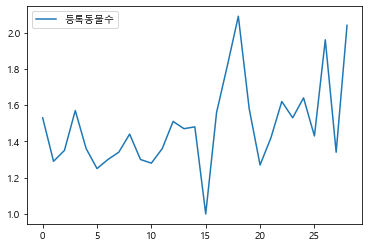

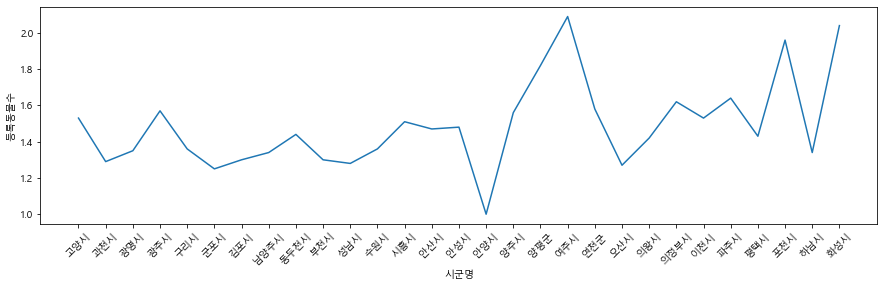

In [85]:
new_df_sigun_avg.plot()
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.lineplot(data=new_df_sigun_avg, x ='시군명', y ='등록동물수')

In [ ]:
sns.scatterplot(data=new_df_sigun_avg, x="경도", y="위도", hue="등록동물수")